#**GAME OF THRONES NETWORK ANALYSIS**

![alt text](https://static1.srcdn.com/wordpress/wp-content/uploads/2019/05/Game-of-Thrones-Season-8-Finale-Cast-Iron-Throne.jpg)

In [0]:
!pip install nxviz

In [0]:
import pandas as pd

###load dataset

In [0]:
b1= pd.read_csv('/content/drive/My Drive/gameofthrones/book1.csv')
b2= pd.read_csv('/content/drive/My Drive/gameofthrones/book2.csv')
b3= pd.read_csv('/content/drive/My Drive/gameofthrones/book3.csv')
b4= pd.read_csv('/content/drive/My Drive/gameofthrones/book4.csv')
b5= pd.read_csv('/content/drive/My Drive/gameofthrones/book5.csv')

###libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict

import networkx as nx
import nxviz as nxv
import community

#BOOK WISE COMPARISON

In [0]:
df_book1= pd.read_csv('/content/drive/My Drive/gameofthrones/book1.csv')
df_book2= pd.read_csv('/content/drive/My Drive/gameofthrones/book2.csv')
df_book3= pd.read_csv('/content/drive/My Drive/gameofthrones/book3.csv')
df_book4= pd.read_csv('/content/drive/My Drive/gameofthrones/book4.csv')
df_book5= pd.read_csv('/content/drive/My Drive/gameofthrones/book5.csv')

### Set of Unique sources and targets

In [0]:
book_list=[df_book1,df_book2,df_book3,df_book4,df_book5]
i=0
book_nodes_list=[]
for book in book_list:
  i=i+1
  print('Book',i)
  print('count of unique sources:',len(set(book['Source'])))
  print('count of unique targets:',len(set(book['Target'])))
  uniques_sources=set(book['Source'])
  unique_target=set(book['Target'])
  book_nodes_list.append(uniques_sources.union(unique_target))

Book 1
count of unique sources: 139
count of unique targets: 143
Book 2
count of unique sources: 193
count of unique targets: 186
Book 3
count of unique sources: 235
count of unique targets: 223
Book 4
count of unique sources: 190
count of unique targets: 217
Book 5
count of unique sources: 231
count of unique targets: 233


In [0]:
def make_graph(nodes_df,book_data):
    gr = nx.Graph()

    for x in nodes_df:
        gr.add_node(x)

    for index, row in book_data.iterrows():
        source=row['Source']
        target=row['Target']
        weight_value=row['weight']
        gr.add_edge(source,target,weight=weight_value)
    
    return gr

# g =  make_graph(book_nodes_list,book_list)   

#Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections.

#Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node.It decides that a node is important if it is connected to other important nodes.

#Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network.

#Closeness Centrality
Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
m=0
for node_set,book_frame in zip(book_nodes_list, book_list):
  m=m+1
  print("Similarity of Book",m )
  grs=make_graph(list(node_set),book_frame)
  deg_cen_book1 = nx.degree_centrality(grs)
  book1_cen=sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
  btw_cen_book1 = nx.betweenness_centrality(grs)
  book1_btw_cen=sorted(btw_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
  eigen_cen_book1 = nx.eigenvector_centrality_numpy(grs)
  book1_eigen_cen=sorted(eigen_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
  close_cen_book1 = nx.closeness_centrality(grs)
  book1_close_cen=sorted(close_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
  name_list_deg=[]
  c_list_deg=[]
  name_list_btw=[]
  c_list_btw=[]
  name_list_eigen=[]
  c_list_eigen=[]
  name_list_close=[]
  c_list_close=[]
  for i in range(0,len(book1_cen)):
    name_list_deg.append(book1_cen[i][0])
    c_list_deg.append(book1_cen[i][1])
  for i in range(0,len(book1_btw_cen)):
    name_list_btw.append(book1_btw_cen[i][0])
    c_list_btw.append(book1_btw_cen[i][1])
  for i in range(0,len(book1_eigen_cen)):
    name_list_eigen.append(book1_eigen_cen[i][0])
    c_list_eigen.append(book1_eigen_cen[i][1])
  for i in range(0,len(book1_close_cen)):
    name_list_close.append(book1_close_cen[i][0])
    c_list_close.append(book1_close_cen[i][1])
  
  fig = make_subplots(rows=2, cols=2, shared_yaxes=True,subplot_titles=("Degree Centrality ","Betweenness Centrality", "Eigenvector Centrality","Closeness Centrality"))

  fig.add_trace(go.Bar(x=name_list_deg, y=c_list_deg,
                      marker=dict(color=c_list_deg, coloraxis="coloraxis")),
               1, 1)

  fig.add_trace(go.Bar(x=name_list_btw, y=c_list_btw,
                      marker=dict(color=c_list_btw, coloraxis="coloraxis")),
                1, 2)

  fig.add_trace(go.Bar(x=name_list_eigen, y=c_list_eigen,
                      marker=dict(color=c_list_eigen, coloraxis="coloraxis")),
                2,1)

  fig.add_trace(go.Bar(x=name_list_close, y=c_list_close,
                      marker=dict(color=c_list_close, coloraxis="coloraxis")),
                2,2)

  fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
  fig.show()



Similarity of Book 1


Similarity of Book 2


Similarity of Book 3


Similarity of Book 4


Similarity of Book 5


#GOT Similarity : Important Character

In [0]:
Got_df= df_book1.copy()
Got_df.shape

(684, 5)

In [0]:
Got_df=Got_df.append(df_book2)
Got_df=Got_df.append(df_book3)
Got_df=Got_df.append(df_book4)
Got_df=Got_df.append(df_book5)
Got_df.shape

(3909, 5)

In [0]:

uniques_sources=set(Got_df['Source'])
unique_target=set(Got_df['Target'])
Got_Nodes=uniques_sources.union(unique_target)

In [430]:
Got_graph=make_graph(list(Got_Nodes),Got_df)
deg_cen_Got = nx.degree_centrality(Got_graph)
Got_cen=sorted(deg_cen_Got.items(), key=lambda x:x[1], reverse=True)[0:10]
btw_cen_Got = nx.betweenness_centrality(Got_graph)
Got_btw_cen=sorted(btw_cen_Got.items(), key=lambda x:x[1], reverse=True)[0:10]
name_list_deg=[]
c_list_deg=[]
name_list_btw=[]
c_list_btw=[]
for i in range(0,len(Got_cen)):
  name_list_deg.append(Got_cen[i][0])
  c_list_deg.append(Got_cen[i][1])
for i in range(0,len(Got_btw_cen)):
  name_list_btw.append(Got_btw_cen[i][0])
  c_list_btw.append(Got_btw_cen[i][1])
fig = make_subplots(rows=2, cols=1, shared_yaxes=True,subplot_titles=("Degree Centrality ","Betweenness Centrality", "Eigenvector Centrality","Closeness Centrality"))

fig.add_trace(go.Bar(x=name_list_deg, y=c_list_deg,
                    marker=dict(color=c_list_deg, coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=name_list_btw, y=c_list_btw,
                    marker=dict(color=c_list_btw, coloraxis="coloraxis")),
              2, 1)
fig.update_layout(coloraxis=dict(colorscale='pubugn'), showlegend=False)
fig.show()



> According to degree centrality and betweeness centrality `John-snow` and `Tyrion-Lannister`were the important characters



# Network of Top Characters

Name: 
Type: Graph
Number of nodes: 47
Number of edges: 46
Average degree:   1.9574


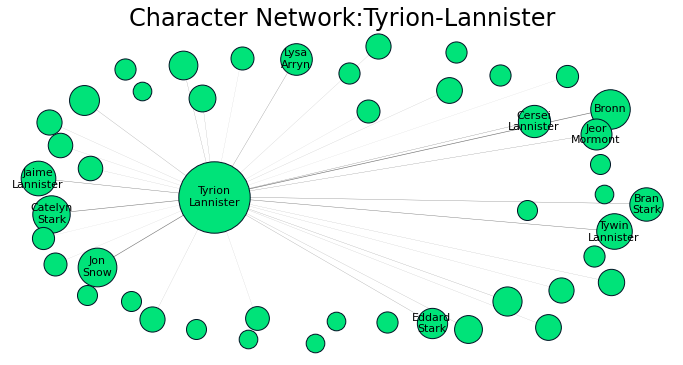

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 37
Average degree:   1.9474


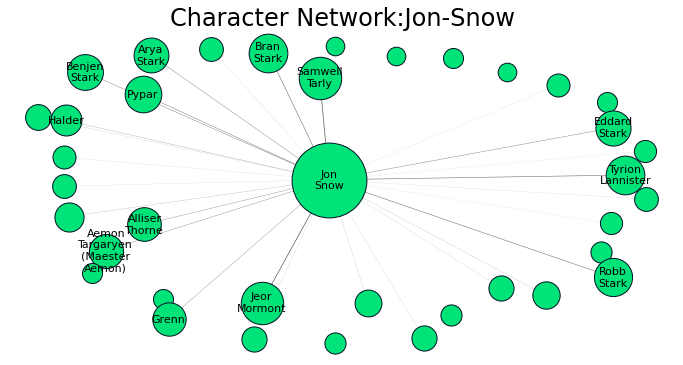

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 29
Average degree:   1.9333


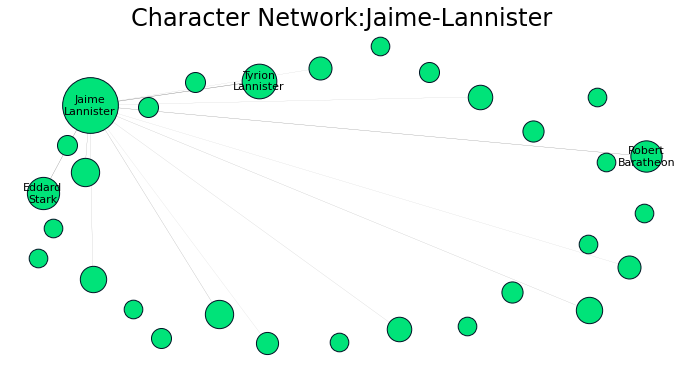

Name: 
Type: Graph
Number of nodes: 31
Number of edges: 30
Average degree:   1.9355


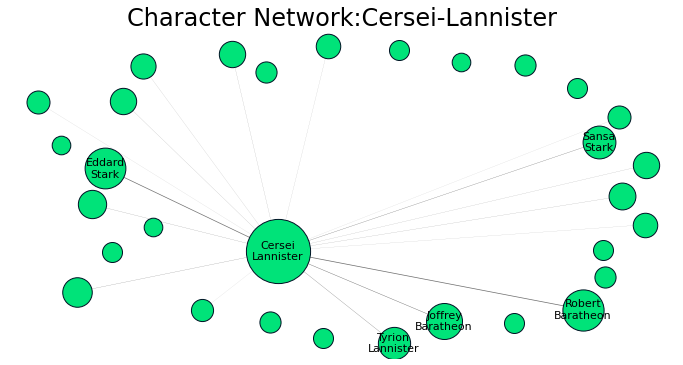

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 12
Average degree:   1.8462


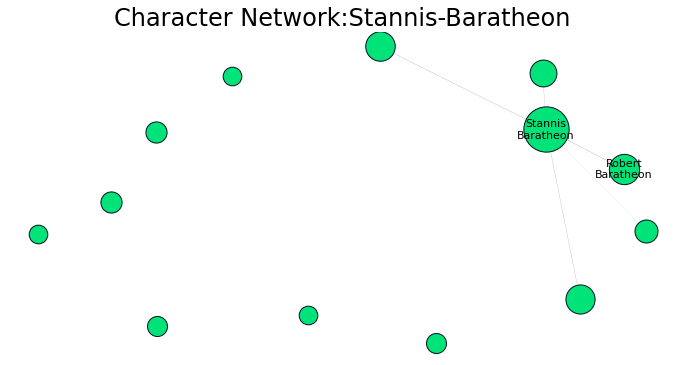

Name: 
Type: Graph
Number of nodes: 28
Number of edges: 27
Average degree:   1.9286


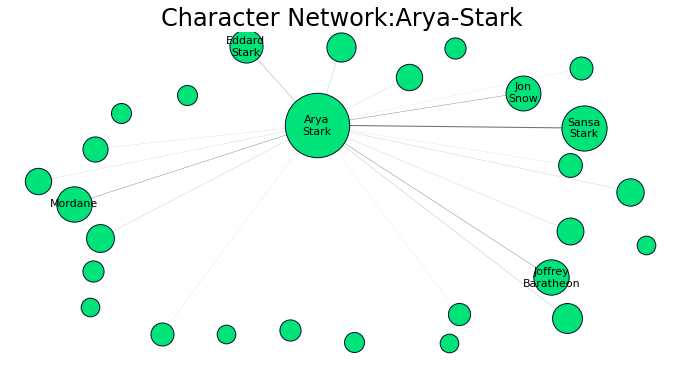

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 43
Average degree:   1.9545


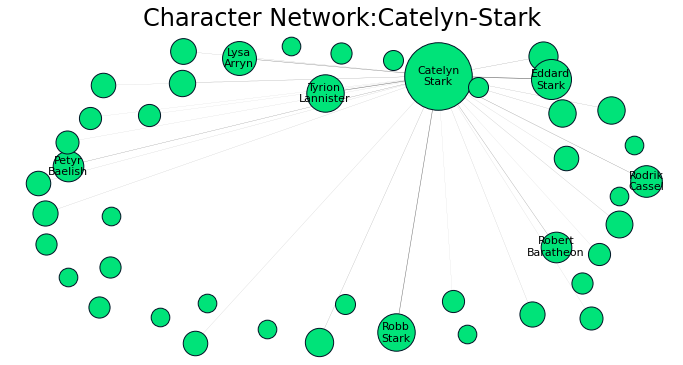

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 35
Average degree:   1.9444


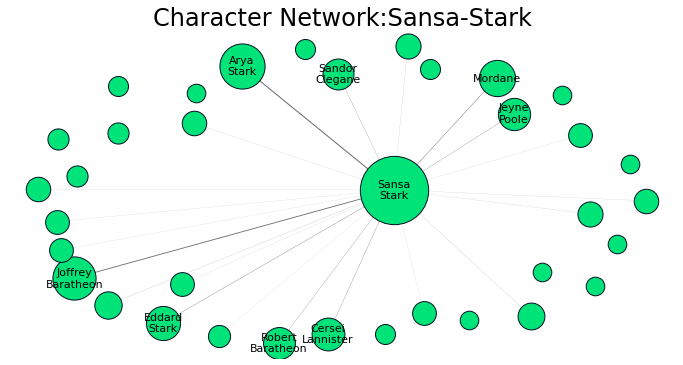

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 66
Average degree:   1.9701


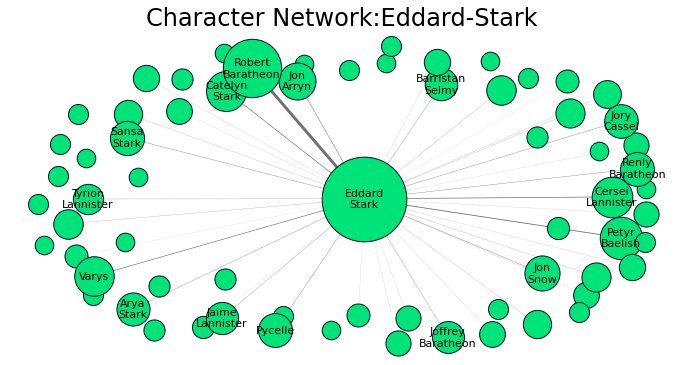

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 35
Average degree:   1.9444


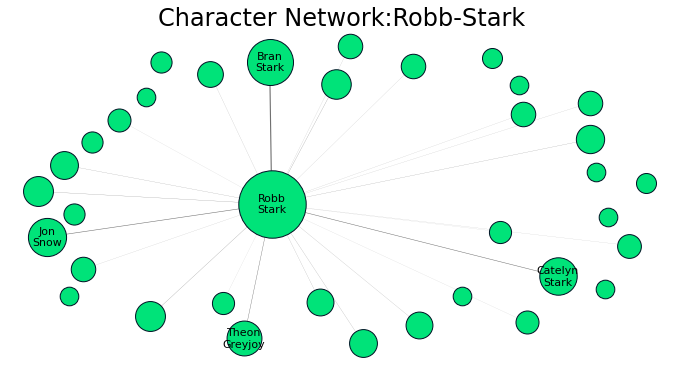

In [0]:
for x in name_list_deg:
  cond_1 = df_book1['Source'] == x  
  cond_2 = df_book1['Target'] == x
  Edd_df=df_book1[cond_1 | cond_2]
  edges_edd = Edd_df.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
  edd_edges = nx.from_pandas_edgelist(edges_edd, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )
  print(nx.info(edd_edges))
  weighted_degrees4 = dict(nx.degree(edd_edges,weight='weight'))
  max_degree4 = max(weighted_degrees4.values())
  subG4 = edd_edges.subgraph([n for n in weighted_degrees4 if weighted_degrees4[n]>1])
  #print(nx.info(subG4))
  pos4 =  nx.spring_layout(subG4,weight='weight',iterations=20, k = 4)
  import matplotlib.pyplot as plt
  plt.axis('off')
  plt.title('Character Network:'+x,fontsize = 24)
  import matplotlib.pyplot as plt
  plt.rcParams["figure.figsize"] = (12,6)

  for node in subG4.nodes():
      size = 200*weighted_degrees4[node]**0.5
      ns = nx.draw_networkx_nodes(subG4,pos4,nodelist=[node], node_size=size, node_color='#00e379')
      ns.set_edgecolor('#021426')

  nx.draw_networkx_labels(subG4,pos4,{n:n.replace('-','\n') for n in subG4.nodes() if weighted_degrees4[n]>20},font_size=11);

  for e in subG4.edges(data=True):
      if e[2]['weight']>5:
          nx.draw_networkx_edges(subG4,pos4,[e],width=e[2]['weight']/100,edge_color='#707070')
  plt.show()



> Nodes with the appearing Labels are the ones with whom they have more number of interactions.



##Time for network of Thrones

In [431]:
books = []
wd = '/content/drive/My Drive/gameofthrones/'
for i in range(5):
    books.append(pd.read_csv(wd + 'book{}.csv'.format(i+1)))
all_books = pd.concat(books)

#we will sum all the books into a single edge between characters
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
edges.sort_values('weight',ascending=False).head()
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )
print(nx.info(GOT))

weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])
print(nx.info(subG))
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

Name: 
Type: Graph
Number of nodes: 796
Number of edges: 2823
Average degree:   7.0930
Name: 
Type: Graph
Number of nodes: 63
Number of edges: 496
Average degree:  15.7460


Plot the network:

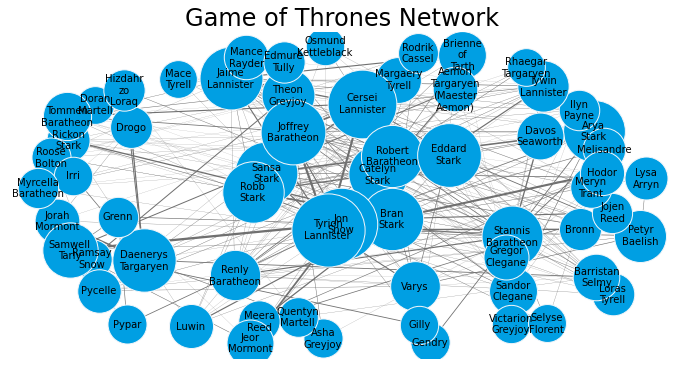

In [432]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

## Evolution of Characters

In [0]:
evo_list=[]
for node_set,book_frame in zip(book_nodes_list, book_list):
  grs=make_graph(list(node_set),book_frame)
  deg_cen_book1 = nx.degree_centrality(grs)
  book1_cen=sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[:]
  evo_list.append(book1_cen)



In [0]:
#eddard-stark evolution
ed_cen=[]
ty_cen=[]
jm_cen=[]
cl_cen=[]
sb_cen=[]
js_cen=[]
for ls in evo_list:
  for name in ls:
    if name[0]=='Eddard-Stark':
      ed_cen.append(name[1])
for ls in evo_list:
  for name in ls:
    if name[0]=='Tyrion-Lannister':
      ty_cen.append(name[1])
for ls in evo_list:
  for name in ls:
    if name[0]=='Jaime-Lannister':
      jm_cen.append(name[1])
for ls in evo_list:
  for name in ls:
    if name[0]=='Cersie-Lannister':
      cl_cen.append(name[1])
for ls in evo_list:
  for name in ls:
    if name[0]=='Stannis-Baratheon':
      sb_cen.append(name[1])
for ls in evo_list:
  for name in ls:
    if name[0]=='Jon-Snow':
      js_cen.append(name[1])

In [0]:
import plotly.graph_objects as go

Book_No=['Book1','Book2','Book3','Book4','Book5']
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=Book_No, y=ed_cen,
                    mode='lines+markers',
                    name='Eddard-Stark'))
fig.add_trace(go.Scatter(x=Book_No, y=ty_cen,
                    mode='lines+markers',
                    name='Tyrion-Lannister'))
fig.add_trace(go.Scatter(x=Book_No, y=jm_cen,
                    mode='lines+markers',
                    name='Jaime-Lannister'))
fig.add_trace(go.Scatter(x=Book_No, y=cl_cen,
                    mode='lines+markers',
                    name='Cersie-Lannister'))
fig.add_trace(go.Scatter(x=Book_No, y=sb_cen,
                    mode='lines+markers',
                    name='Stannis-Baratheon'))
fig.add_trace(go.Scatter(x=Book_No, y=js_cen,
                    mode='lines+markers',
                    name='Jon-Snow'))
fig.update_layout(title='Evolution of Characters',
                   xaxis_title='Book',
                   yaxis_title='Contribution')

fig.show()



> Evolution of five famous characers throughout the `Game of Thrones`.



##Page Rank Complete Show

The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [442]:
Page_rank_res=nx.pagerank(Got_graph)
Page_rank_top=sorted(Page_rank_res.items(), key=lambda x:x[1], reverse=True)[0:10]
Page_rank_top
name=[]
value=[]
for c in Page_rank_top:
  name.append(c[0])
  value.append(c[1])

import plotly.express as px
fig = px.bar( y=name, x=value, orientation='h', color = name)
fig.show()



> According to page-rank `Jon-Snow` is at the top of the Contributors,followed by `Tyrion Lannister`.



##Suppose Bran and Sam told Jon a secret. Who will find out about it?

In [0]:
infection_times = {}


In [0]:
def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [0]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#b50707')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [0]:
infection_times = {'Bran-Stark':-1,'Samwell-Tarly':-1,'Jon-Snow':0}
# {'Eddard-Stark':-1,'Robert-Baratheon':-1,'Robb-Stark':0}
# {'Bran-Stark':-1,'Samwell-Tarly':-1,'Jon-Snow':0}

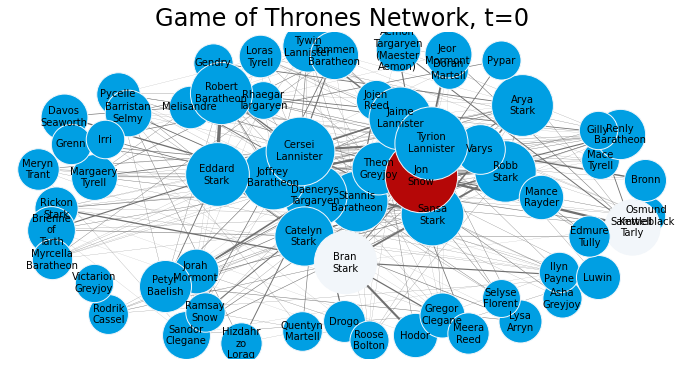

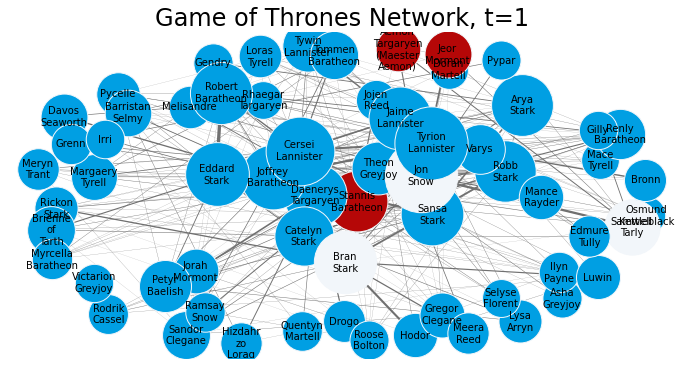

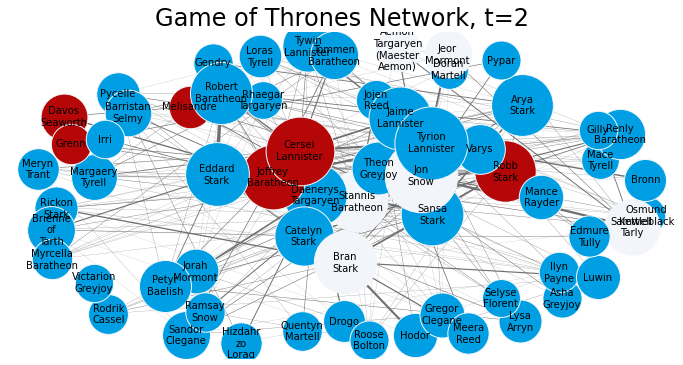

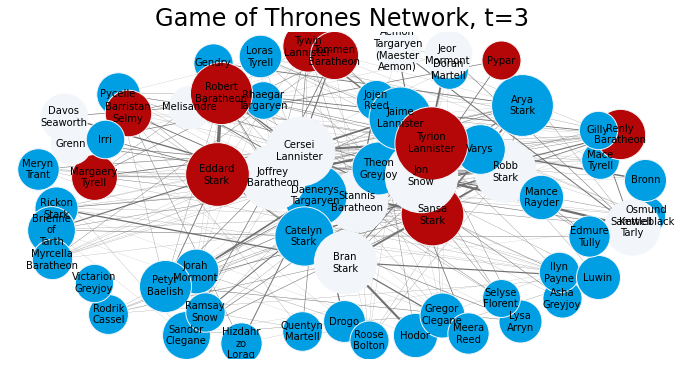

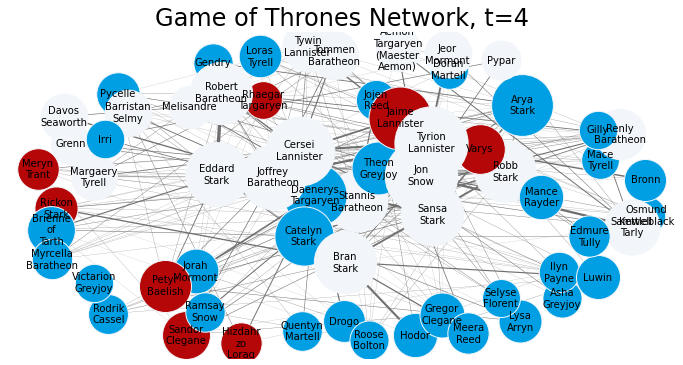

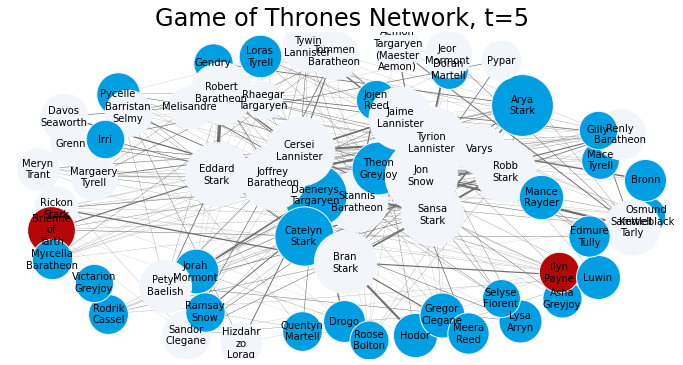

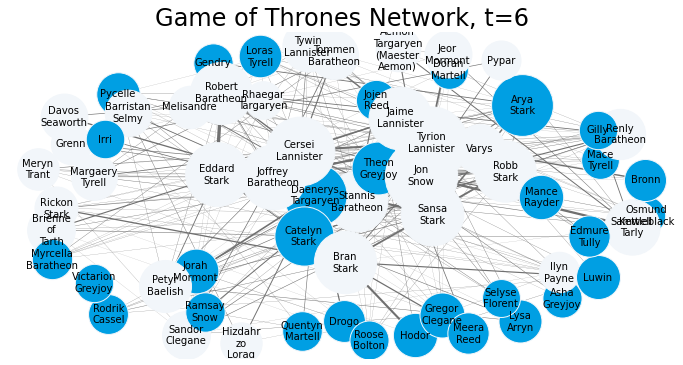

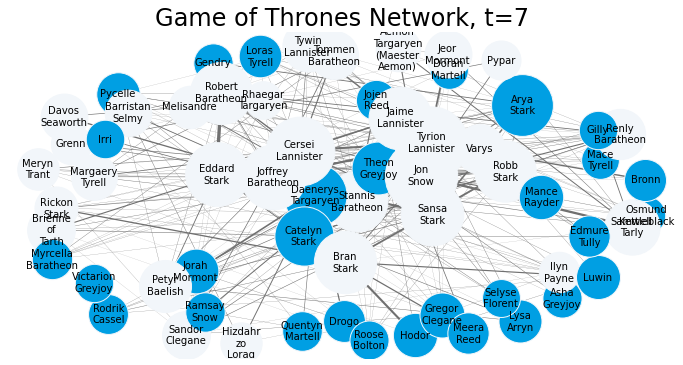

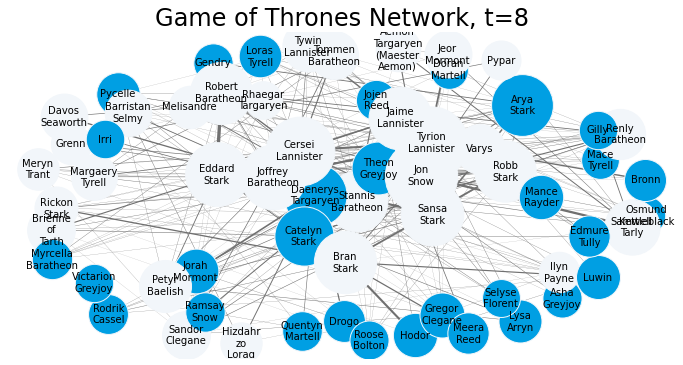

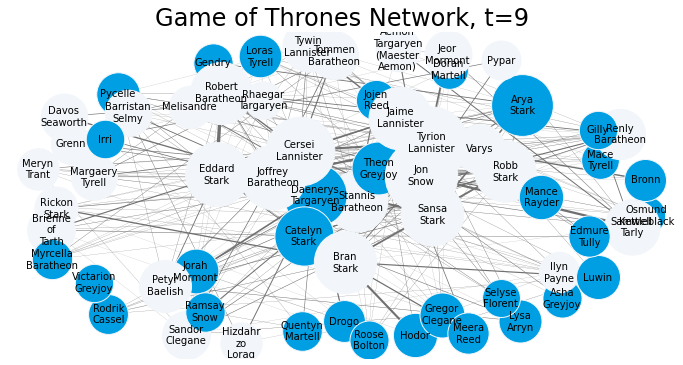

In [0]:
for t in range(10):
    plot_G(subG,pos,infection_times,t)
    infection_times = independent_cascade(subG,t,infection_times)



> Graphs Shows how the message transfers from one person to another.



#Finding the correlation between these five techniques.

pagerank

degree centrality

betweenness centrality

eigenvalue centrality

closeness centrality





In [0]:
top = pd.DataFrame.from_dict(dict(nx.degree(subG)),orient='index').sort_values(0,ascending=False)
top.columns = ['Degree']
top['Weighted_Degree'] =  pd.DataFrame.from_dict(dict(nx.degree(subG,weight='weight')),orient='index')
top['PageRank'] = pd.DataFrame.from_dict(dict(nx.pagerank_numpy(subG,weight='weight')),orient='index')
top['Betweenness'] =  pd.DataFrame.from_dict(dict(nx.betweenness_centrality(subG,weight='weight')),orient='index')
top['Eigenvector_Centrality'] =  pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(subG,weight='weight')),orient='index')
top['closeness_Centrality'] =  pd.DataFrame.from_dict(dict(nx.closeness_centrality(subG)),orient='index')


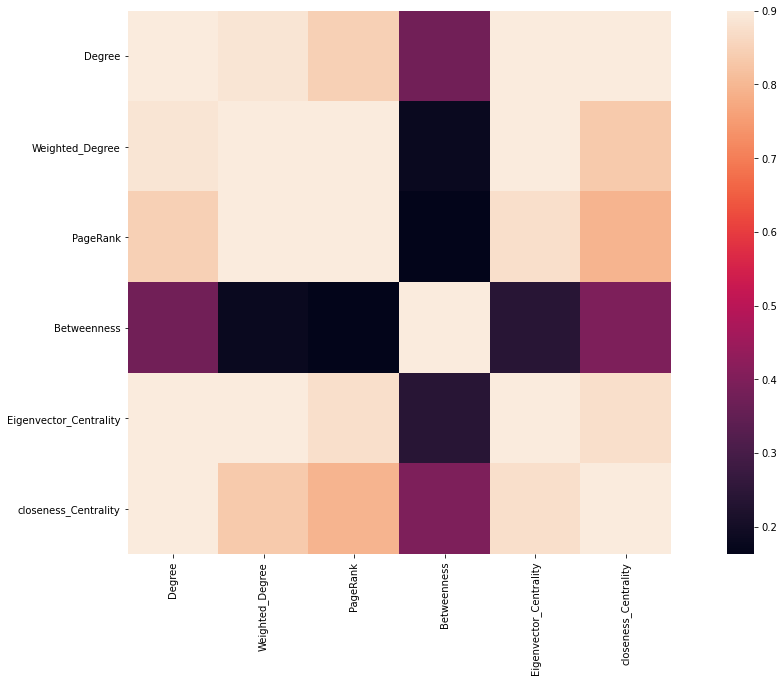

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corrmat = top.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)



> Correlation matrix illustrates that, `Weighted_Degree`, `Pagerank`,`Eigenvector_centrality` and `closeness_centrality` are closely related to each other.



##Choosing best Centrality parameter 

In [0]:
max_budget = len(subG.nodes())
trials = 50
all_results = []
for budget in tqdm.tqdm_notebook(range(max_budget)):
    results = {'budget':budget}
    for method in methods:
        infections = []
        for i in range(trials):
            infected = 0
            t= 0
            infection_times = {n:0 for n in top.sort_values(method,ascending=False).index[:budget]}
            while len(infection_times)>infected:
                #t+=1
                infected = len(infection_times)
                infection_times = independent_cascade(subG,t,infection_times)
                t+=1
            infections.append(infected)
        results[method] = np.round(np.mean(infections)/len(subG.nodes()),2)

    all_results.append(results)

In [0]:
res_df = pd.concat([pd.DataFrame.from_dict(r,orient='index').T 
                        for r in all_results]).set_index('budget')

In [0]:
res_df.index = res_df.index/len(subG.nodes())


,Degree,Weighted_Degree,PageRank,Betweenness,Eigenvector_Centrality,closeness_Centrality
budget,,,,,,
0.000000,0.00,0.00,0.00,0.00,0.00,0.00
0.015873,0.50,0.49,0.52,0.48,0.49,0.53
0.031746,0.52,0.50,0.52,0.53,0.51,0.52
0.047619,0.51,0.53,0.51,0.53,0.52,0.51
0.063492,0.51,0.53,0.52,0.53,0.53,0.50


In [0]:
modified = res_df.reset_index()
modified.head()
# print("Modified Dataframe : ")
# print(modified)

,budget,Degree,Weighted_Degree,PageRank,Betweenness,Eigenvector_Centrality,closeness_Centrality
0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
1,0.015873,0.50,0.49,0.52,0.48,0.49,0.53
2,0.031746,0.52,0.50,0.52,0.53,0.51,0.52
3,0.047619,0.51,0.53,0.51,0.53,0.52,0.51
4,0.063492,0.51,0.53,0.52,0.53,0.53,0.50


In [453]:
import plotly.graph_objects as go

# Add data
budget = modified.budget
Degree = modified.Degree
Weighted_Degree = modified.Weighted_Degree
PageRank = modified.PageRank
Betweenness = modified.Betweenness
Eigenvector_Centrality = modified.Eigenvector_Centrality
closeness_Centrality = modified.closeness_Centrality

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=budget, y=Eigenvector_Centrality, name='Eigenvector_Centrality',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=budget, y=closeness_Centrality, name = 'closeness_Centrality',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=budget, y=PageRank, name='PageRank',
                         line=dict(color='firebrick', width=4,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=budget, y=Betweenness, name='Betweenness',
                         line = dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=budget, y=Degree, name='Degree',
                         line = dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=budget, y=Weighted_Degree, name='Weighted_Degree',
                         line=dict(color='royalblue', width=4, dash='dot')))

# Edit the layout
fig.update_layout(title='Budget Comparison for different centralities',
                   xaxis_title='budget',
                   yaxis_title='degrees')


fig.show()



> `Betweeness Centrality` Accounts for the maximum Importance.



##Whats Up with Stannis Baratheon

Dispersion

A link between two actors (\(u\) and \(v\)) has a high dispersion when their mutual ties (\(s\) and \(t\)) are not well connected with each other.

In [452]:
dispersion_res=nx.dispersion(Got_graph,u='Stannis-Baratheon')
len(dispersion_res.values())
import plotly.offline as pyo
import plotly.graph_objs as go
# roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = list(dispersion_res.keys())
values = list(dispersion_res.values())

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

> According to the definition of Dispersion ,the mutual ties between `Stannis Baratheon` and `Davos-seaworth` are not well connected with each other.



# Conclusion



*   In accordance with comparison between different books ,`Eddard Stark's` contibution keeps on declining as the show moves forward.
*   `Jamie Lannister` follows Zig-Zag trend in terms of contibution to show and ends up at 5th place among top5 characters, whereas Jon-Snow was at the top of list.

*   If we sum up all the 5 books `Tyrion Lannister` and `Jon Snow` are the two Famous Characters.
*   According to page-rank `Jon Snow` and `Tyrion Lannister` were again the famous ones.




